In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\client\Documents\Datasets\Data cleaned.csv')
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Penthouse,3000000,3,3,175,No,12,Cash,Semi Finished,Stone Residence
1,Apartment,4470000,3,2,155,No,2,Installment,Semi Finished,Taj City
2,Apartment,492000,3,2,282,No,4,Cash,Not Finished,New Cairo - El Tagamoa
3,Apartment,1855000,3,3,200,No,2,Cash,Core & Shell,Garden Hills
4,Apartment,410000,2,1,100,No,4,Cash or Installment,Finished,Nakheel
...,...,...,...,...,...,...,...,...,...,...
20460,Apartment,6016000,3,2,164,No,2,Cash or Installment,Core & Shell,Galleria Moon Valley
20461,Apartment,4840000,3,3,176,No,9,Installment,Finished,Camp Caesar
20462,Apartment,5200000,3,3,175,No,0,Installment,Semi Finished,6th of October
20463,Apartment,2717000,2,2,161,No,2,Cash or Installment,Finished,New Capital City


In [4]:
df['target'] = df['Furnished'].map({'Yes': 1, 'No': 0})

In [5]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,target
0,Penthouse,3000000,3,3,175,No,12,Cash,Semi Finished,Stone Residence,0
1,Apartment,4470000,3,2,155,No,2,Installment,Semi Finished,Taj City,0
2,Apartment,492000,3,2,282,No,4,Cash,Not Finished,New Cairo - El Tagamoa,0
3,Apartment,1855000,3,3,200,No,2,Cash,Core & Shell,Garden Hills,0
4,Apartment,410000,2,1,100,No,4,Cash or Installment,Finished,Nakheel,0
...,...,...,...,...,...,...,...,...,...,...,...
20460,Apartment,6016000,3,2,164,No,2,Cash or Installment,Core & Shell,Galleria Moon Valley,0
20461,Apartment,4840000,3,3,176,No,9,Installment,Finished,Camp Caesar,0
20462,Apartment,5200000,3,3,175,No,0,Installment,Semi Finished,6th of October,0
20463,Apartment,2717000,2,2,161,No,2,Cash or Installment,Finished,New Capital City,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20465 entries, 0 to 20464
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            20465 non-null  object
 1   Price           20465 non-null  int64 
 2   Bedrooms        20465 non-null  int64 
 3   Bathrooms       20465 non-null  int64 
 4   Area            20465 non-null  int64 
 5   Furnished       20465 non-null  object
 6   Level           20465 non-null  int64 
 7   Payment_Option  20465 non-null  object
 8   Delivery_Term   20465 non-null  object
 9   City            20465 non-null  object
 10  target          20465 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.7+ MB


In [7]:
df.isna().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Payment_Option    0
Delivery_Term     0
City              0
target            0
dtype: int64

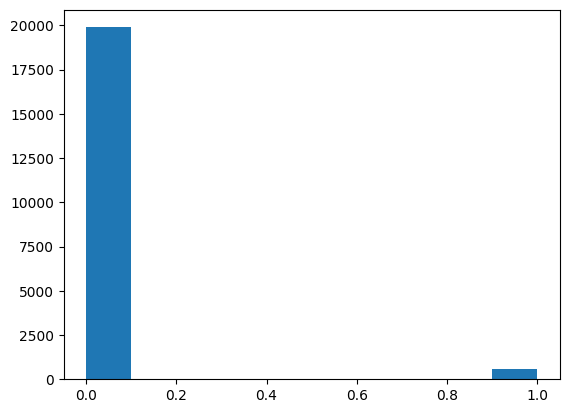

In [8]:
plt.hist(df["target"])
plt.show()

In [9]:
df=df.drop(['Furnished','Type','Payment_Option',"Delivery_Term",'City'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
rf_classifier = RandomForestClassifier()
clf=rf_classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [12]:
rf_classifier.feature_importances_

array([0.46714658, 0.04136621, 0.03389403, 0.32787037, 0.12972282])

In [13]:
df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'Area', 'Level', 'target'], dtype='object')

In [14]:
confusion_matrix(y_test,y_pred)

array([[5931,   33],
       [ 160,   16]], dtype=int64)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


<Axes: >

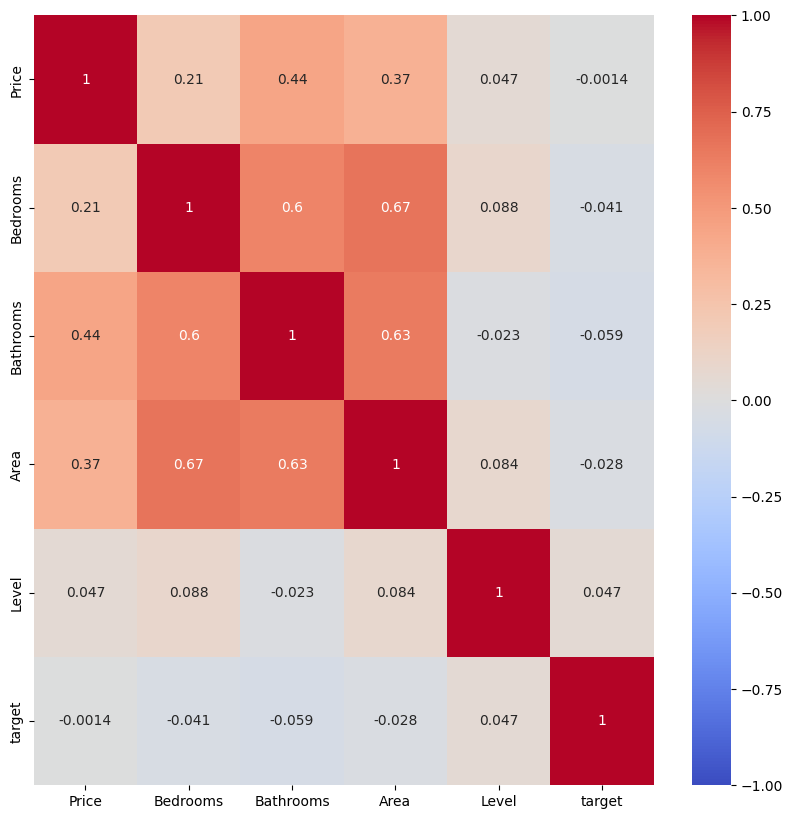

In [22]:
df_num=df
corr = df_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, cmap='coolwarm', vmin=-1, vmax=1)


<Axes: >

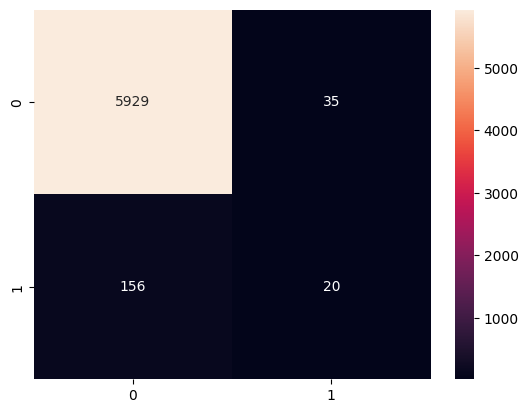

In [24]:

sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True , fmt ="g")

In [17]:
from sklearn.model_selection import cross_val_score #cross validation
cross_val_score(rf_classifier,X_train,y_train,cv=10) #returns accuracy score for each fold  

array([0.96929518, 0.97278437, 0.9713887 , 0.9713887 , 0.96999302,
       0.97346369, 0.97206704, 0.96997207, 0.97067039, 0.96927374])

In [25]:
pred = np.array([850000,2 , 1, 135, 1]).reshape(1, -1)
predictions = clf.predict(pred)
print("Predictions:", predictions)

Predictions: [1]


c:\Users\client\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
